# Lecture 3: Sampling distributions of estimators

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sb
import matplotlib.pyplot as plt
pd.set_option('precision', 2)
%precision 2

'%.2f'

In [2]:
data = pd.read_csv('origin_mobility.csv')

# This lecture

asdfasdf

# Introduction

Imagine that instead of collecting data from all 712 commuting zones in the US, the researchers behind [American geography of opportunity reveals European origins](https://www.pnas.org/content/116/13/6045) had only been able to collect data from 20 randomly selected commuting zones, because the data collection process was very costly and they therefore did not have resources to survey all the zones. I have simulated this situation by randomly sampling 20 observations from the full dataset. The red dots in the plot below display the values of the *mobility* and *german* variables for these 20 observations. The blue dots display these values for the rest of the dataset.

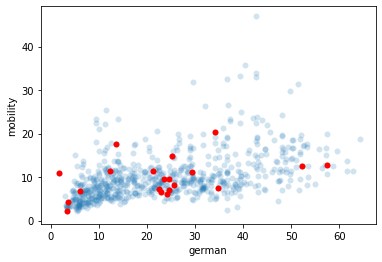

In [3]:
data_sample = data.sample(n=20,random_state=2238)
f_sample, axes_sample = plt.subplots(1,1,figsize=(6,4))
sb.scatterplot('german','mobility',data=data,alpha=0.2,linewidth=0,ax=axes_sample)
sb.scatterplot('german','mobility',data=data_sample,color='red',linewidth=0,ax=axes_sample);

The linear model found by fitting a linear regression with *mobility* as outcome and *german* as predictor on the full dataset is shown by the blue line in the plot below. The red line displays the model found by fitting the same linear regression on the dataset consisting only the 20 randomly selected commuting zones:

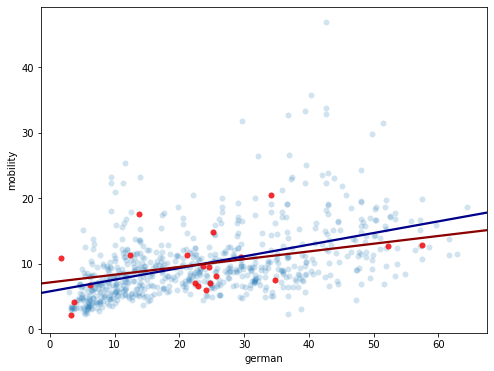

In [4]:
f_reg, axes_reg = plt.subplots(1,1,figsize=(8,6))
sb.regplot('german','mobility',data=data,ci=None,truncate=False,scatter_kws={'alpha':0.2,'linewidth':0},
           line_kws={'color':'darkblue'},ax=axes_reg)
sb.regplot('german','mobility',data=data_sample,ci=None,truncate=False,scatter_kws={'color':'red','linewidth':0},
           line_kws={'color':'darkred'},ax=axes_reg);

We see that the fitted linear models are similar, but not identical. In particular, we see that the model from the sampled subset underestimates the slope of the line compared to the model from the full dataset. However, if the researchers had only collected data on the randomly sampled commuting zones, we would have no way of knowing this, since we would only be able to fit a linear regression to the sampled data, and the plot would consist of only the red dots and line. Thus, this particular random sample would lead us to underestimate the slope of the linearly modelled relationship between commuting zones' german population share and their intergenerational mobility. If chance had handed the researchers a different random sample, we would have ended up with a slightly different linear model and might instead have overestimated the slope. Thus, the plots below show the linear models resulting from fitting the same linear regression on 9 different random samples of 20 observations from the full dataset. The blue line in the plots are the model from the full dataset.

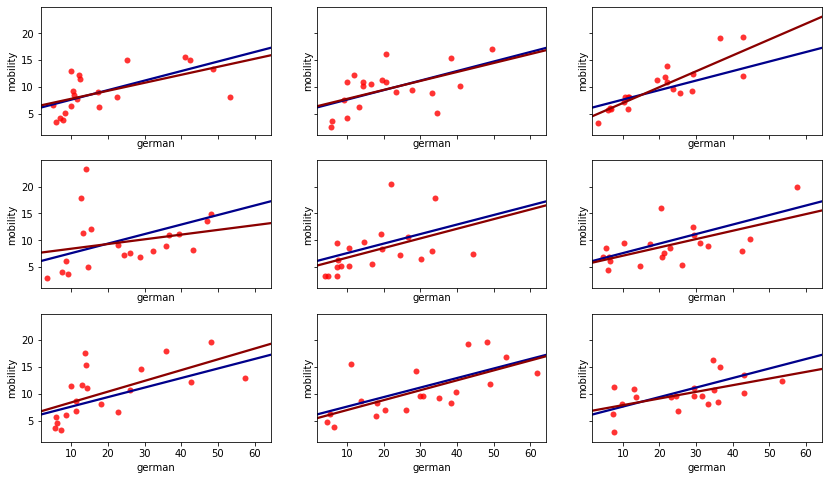

In [5]:
np.random.seed(2331)
data_samples = [data.sample(n=20) for i in range(0,9)]
f_regs, axes_regs = plt.subplots(3,3,figsize=(14,8),sharex=True,sharey=True)
for ax,d in zip(axes_regs.flatten(),data_samples) :
    sb.regplot('german','mobility',data=data,ci=None,scatter=False,
           line_kws={'color':'darkblue'},ax=ax)
    sb.regplot('german','mobility',data=d,ci=None,truncate=False,scatter_kws={'color':'red','linewidth':0},
           line_kws={'color':'darkred'},ax=ax);

We see that the intercepts and slopes of the fitted linear models vary quite a lot dependent on which random sample the model is fitted on. However, we imagined that the researchers had only collected a single random sample. They therefore e.g. have no way of knowing, if this particular sample leads them to under- or overestimate the slope compared to the unknown linear model from the full dataset. However, statisticians have developed techniques to deal with the uncertainty in a model's fitted parameters that arises from the fact that the data, which the model is fitted on, would be slightly different in another sample from the same underlying data source. The most standard methods in quantitative social science is to calculate the fitted parameters' standard errors, p-values and the confidence intervals. The aim of this lecture is to teach you the principles behind these statistical constructions.

# Sampling Distributions of Fitted Parameters

Let us imagine the following process. The researchers draw 1000 random samples, which each consists of 20 out of the 712 commuting zones. They then fit a linear regression with mobility as outcome and german as predictor to each of the samples. They store the fitted intercept and slope for each of the models in a dataframe. It would not make sense to follow this kind of process in actual research, but it is nevertheless the conceptual foundation of the most standard statistical methods to deal with the uncertainty arising from sampling (standard errors, p-values and confidence intervals). I have simulated the process below and shown the first five rows of the resulting dataframe.

In [32]:
np.random.seed(1512)
data_samples = [data.sample(n=20) for i in range(0,1000)]
models = [sm.ols('mobility~german',d).fit() for d in data_samples]
fitted_pars = pd.DataFrame({'sample_id':range(1,1001)})
fitted_pars['intercept'] = [m.params[0] for m in models]
fitted_pars['slope'] = [m.params[1] for m in models]
fitted_pars.round(2).head()

,sample_id,intercept,slope
0,1,3.49,0.37
1,2,6.78,0.21
2,3,4.91,0.25
3,4,5.78,0.22
4,5,1.69,0.32


The plots below show the distributions of the fitted intercept and slope parameters resulting from the process described and simulated above. Each dot in the left plot shows the fitted intercept and slope of a linear model fitted on a particular of the 1000 samples. The black dot displays the fitted intercept and slope from the linear model fitted on the full data. Likewise, the dashed black lines in the middle and right plot are the fitted intercept (middle plot) and slope (right plot) from the linear model fitted on the full data.

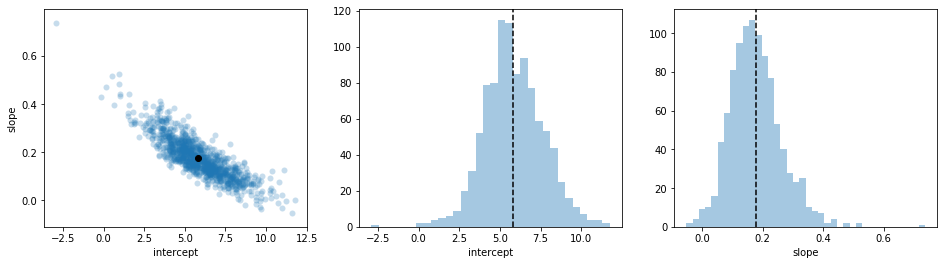

In [39]:
model_fulldata = sm.ols('mobility~german',data=data).fit()
samp_dist_fig, samp_dist_axes = plt.subplots(1,3,figsize=(16,4))
sb.scatterplot('intercept','slope',data=fitted_pars,ax=samp_dist_axes[0],linewidth=0,alpha=0.25)
sb.distplot(fitted_pars['intercept'],kde=False,ax=samp_dist_axes[1])
sb.distplot(fitted_pars['slope'],kde=False,ax=samp_dist_axes[2])
samp_dist_axes[0].scatter(model_fulldata.params[0],model_fulldata.params[1],color='black')
samp_dist_axes[1].axvline(model_fulldata.params[0],color='black',linestyle='--')
samp_dist_axes[2].axvline(model_fulldata.params[1],color='black',linestyle='--')

**Exercise 3.1:** How would you interpret the fact that the distribution of the intercept and slope parameters from the 1000 samples are concentrated around the fitted parameters from the entire 712 commuting zones? Do you think that this property should make a researcher more or less willing to use the fitted parameters from a single random sample of 20 commuting zones as representative for all commuting zones? The researcher would do this, if he/she only had the resources to survey 20 randomly sampled commuting zones, but still decided to go ahead with the research and afterwards claimed to be able to say something about all the commuting zones.

**Exercise 3.2:** For each of the red dots in the left plot below, discuss what sample of 20 commuting zones could have resulted in a linear model with these fitted parameters. You can use the scatterplot of the *mobility* and *german* variable for the entire 712 commuting zones to facilitate the discussion.

**Exercise 3.3:** Why negation relationship between intercept and slope?

**Exercise 3.4:** Number of observations and precision.


# Standard Errors and Confidence Intervals

# The full dataset as a sample from a 